### 1.1.1 Пример
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999997 -0.949999999999999


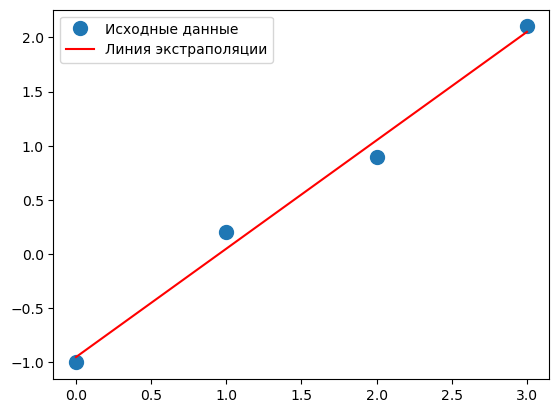

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0, 1, 2, 3])
y = np.array([-1, .2, .9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линия экстраполяции')
plt.legend()
plt.show()

### 1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [2]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

x.tofile('4/x_data.txt', '\n')
y.tofile('4/y_data.txt', '\n')

FileNotFoundError: [Errno 2] No such file or directory: '4/x_data.txt'

In [ ]:
x = fromfile('4/x_data.txt', float, sep='\n')
y = fromfile('4/y_data.txt', float, sep='\n')
print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('4/парабола.png')
plt.show()

### 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

In [ ]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('4/Полином 3-й степени.png')
plt.show()

### Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

In [ ]:
x = np.array([-4.6, -3.4, -2.2, -1.0, 0.2, 1.4, 2.6, 3.8, 5.0])
y = np.array([18, 16, 15, 14.5, 16, 17, 15, 13, 11])
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')

m = vstack((x, ones(9))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)

m = vstack((x**2, x, ones(9))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)

m = vstack((x**3, x**2, x, ones(9))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=2)

### 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)
)

In [ ]:
beta = (.25, .75, .5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1


In [ ]:
import scipy as sp
beta = (.25, .75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [ ]:
beta = (.25, .75, .5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [ ]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [ ]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### Задание
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

beta = (0.75, .75)
def myF(x, b0, b1):
    return np.sin(b0 * x) * b1 * x
xdata = np.linspace(-10, 10, 50)
y = myF(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(myF, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - myF(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, myF(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-10, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [.5, .75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

In [ ]:
print(dataset.shape)
dataset.describe()

In [ ]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [ ]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

In [ ]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [ ]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='gray', label='Зарплата')
plt.scatter(X_test, Y_test, color='r')
plt.plot(X_test, y_pred, color='b', linewidth=2)
plt.show()

### 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [ ]:
import numpy as np

y= [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

### 1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y= [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(x)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

In [ ]:
print(dataset.shape)
dataset.describe()

In [ ]:
X = dataset[['x1', 'x2', 'x3']]
Y = dataset['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))

### Задание
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [ ]:
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
dataset = pd.read_csv(url)
labels = dataset.columns

y = np.array(dataset['quality']).transpose()
df1 = pd.DataFrame(y)
x = np.array(dataset.iloc[:, :-1]).transpose()
df2 = pd.DataFrame(x)

df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4', 4: 'x5', 5: 'x6', 6: 'x7', 7: 'x8', 8: 'x9', 9: 'x10', 10: 'x11'}, inplace=False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')

X = dataset[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
Y = dataset['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))

### Задание
Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

Вариант 6
x | y 
--- | --- 
4,0 | 4,0
4,2 | 3,0
4,4 | 6,0
4,6 | 6,0
4,8 | 4,0
5,0 | 4,0

Полином 1 степени: y = 2.57 + 0.43*x
Полином 2 степени: y = -132.25 + 60.70*x + -6.70*x^2
Полином 3 степени: y = 598.75 + -429.91*x + 102.69*x^2 + -8.10*x^3


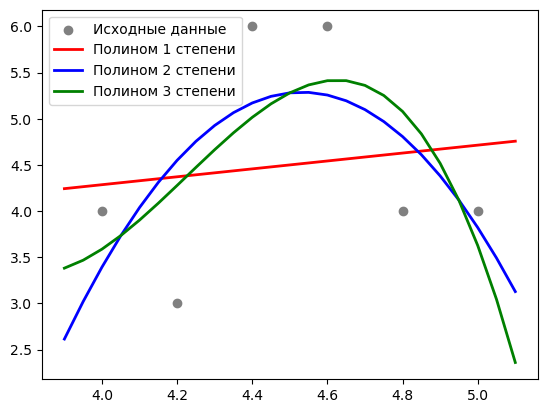

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

x_data = [4., 4.2, 4.4, 4.6, 4.8, 5.]
y_data = [4., 3., 6., 6., 4., 4.]

def first(x, b0, b1):
    return b0 + b1 * x

def second(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2

def third(x, b0, b1, b2, b3):
    return b0 + b1 * x + b2 * x ** 2 + b3 * x ** 3


beta_opt_first, beta_cov_first = sp.optimize.curve_fit(first, x_data, y_data)
beta_opt_second, beta_cov_second = sp.optimize.curve_fit(second, x_data, y_data)
beta_opt_third, beta_cov_third = sp.optimize.curve_fit(third, x_data, y_data)

print(f'Полином 1 степени: y = {beta_opt_first[0]:.2f} + {beta_opt_first[1]:.2f}*x')
print(f'Полином 2 степени: y = {beta_opt_second[0]:.2f} + {beta_opt_second[1]:.2f}*x + {beta_opt_second[2]:.2f}*x^2')
print(f'Полином 3 степени: y = {beta_opt_third[0]:.2f} + {beta_opt_third[1]:.2f}*x + {beta_opt_third[2]:.2f}*x^2 + {beta_opt_third[3]:.2f}*x^3')

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, color='gray', label='Исходные данные')

x = np.linspace(3.9, 5.1, 25)
y = first(x, *beta_opt_first)
ax.plot(x, y, 'r', lw=2, label='Полином 1 степени')

y = second(x, *beta_opt_second)
ax.plot(x, y, 'b', lw=2, label='Полином 2 степени')

y = third(x, *beta_opt_third)
ax.plot(x, y, 'g', lw=2, label='Полином 3 степени')


ax.legend()
plt.show()